#                              Prevention of Panic Due to COVID-19 Using Twitter Data

# PART - 1: IMPORTS LIBRARIES & DATASET

In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
tweets_df = pd.read_excel('Covid_19_Tweets_Dataset.xlsx')

In [3]:
tweets_df

,User_Name,Tweet
0,ALOHA77USA,#CatholicTwitter #Catholics #CatholicChurch #H...
1,prinkujose,RT @ALOHA77USA: #CatholicTwitter #Catholics #C...
2,sbonnin,Can we just learn how to live with this thing ...
3,LindaS4810,RT @ThePaintedBrain: #Socialdistancing - altho...
4,bayanna69,#Socialdistancing - although necessary to redu...
...,...,...
329,BILD_tweets,We know the situation with #Covid-19 is provok...
330,hka8964,#FangBin was angry that the Chinese government...
331,panich52,My mom was very angry': @RiteAid apologizes af...
332,SanduBanu,Angry College Students Break Free From Prolong...


# PART - 2: EXPLORE DATASET

In [4]:
tweets = tweets_df.values.tolist()

In [5]:
tweets

[['ALOHA77USA',
  '#CatholicTwitter #Catholics #CatholicChurch #HolyMass @MissAnscombe #suffering #pain #Healing #prayers #COVID19ireland #COVâ€¦'],
 ['prinkujose',
  'RT @ALOHA77USA: #CatholicTwitter #Catholics #CatholicChurch #HolyMass @MissAnscombe #suffering #pain #Healing #prayers #COVID19ireland #COVâ€¦'],
 ['sbonnin',
  'Can we just learn how to live with this thing #COVID19 and move on. We canâ€™t stop living because weâ€™re scared to diâ€¦ https://t.co/N5q6hnpAmT'],
 ['LindaS4810',
  'RT @ThePaintedBrain: #Socialdistancing - although necessary to reduce the spread of #COVID19, can make people feel isolated &amp; lonely &amp; canâ€¦'],
 ['bayanna69',
  '#Socialdistancing - although necessary to reduce the spread of #COVID19, can make people feel isolated &amp; lonely &amp; câ€¦ https://t.co/RXsnSqM8Gp'],
 ['TheJagdish',
  'Dealing with #pandemic related stress? My comments via @NMSUNews #MentalHealthMatters #Mentalhealth #Anxiety #COVID19 #câ€¦'],
 ['FSherbeny',
  'We would hig

In [6]:
polarity = lambda tweets: TextBlob(tweets).sentiment.polarity
subjectivity = lambda tweets: TextBlob(tweets).sentiment.subjectivity

In [7]:
tweets_df['Polarity'] = tweets_df['Tweet'].apply(polarity)
#tweets_df['Subjectivity'] = tweets_df['Tweet'].apply(subjectivity)

In [8]:
tweets_df

,User_Name,Tweet,Polarity
0,ALOHA77USA,#CatholicTwitter #Catholics #CatholicChurch #H...,0.000000
1,prinkujose,RT @ALOHA77USA: #CatholicTwitter #Catholics #C...,0.000000
2,sbonnin,Can we just learn how to live with this thing ...,0.136364
3,LindaS4810,RT @ThePaintedBrain: #Socialdistancing - altho...,-0.050000
4,bayanna69,#Socialdistancing - although necessary to redu...,-0.050000
...,...,...,...
329,BILD_tweets,We know the situation with #Covid-19 is provok...,0.020833
330,hka8964,#FangBin was angry that the Chinese government...,-0.100000
331,panich52,My mom was very angry': @RiteAid apologizes af...,-0.650000
332,SanduBanu,Angry College Students Break Free From Prolong...,-0.050000


In [9]:
def ratio(Polarity):
    if Polarity > 0:
        return 1
    elif Polarity == 0:
        return 0
    else:
        return -1

In [10]:
tweets_df['Analysis'] = tweets_df['Polarity'].apply(ratio)

In [11]:
tweets_df

,User_Name,Tweet,Polarity,Analysis
0,ALOHA77USA,#CatholicTwitter #Catholics #CatholicChurch #H...,0.000000,0
1,prinkujose,RT @ALOHA77USA: #CatholicTwitter #Catholics #C...,0.000000,0
2,sbonnin,Can we just learn how to live with this thing ...,0.136364,1
3,LindaS4810,RT @ThePaintedBrain: #Socialdistancing - altho...,-0.050000,-1
4,bayanna69,#Socialdistancing - although necessary to redu...,-0.050000,-1
...,...,...,...,...
329,BILD_tweets,We know the situation with #Covid-19 is provok...,0.020833,1
330,hka8964,#FangBin was angry that the Chinese government...,-0.100000,-1
331,panich52,My mom was very angry': @RiteAid apologizes af...,-0.650000,-1
332,SanduBanu,Angry College Students Break Free From Prolong...,-0.050000,-1


In [12]:
tweets_df['Analysis'].value_counts()

-1    172
 1    103
 0     59
Name: Analysis, dtype: int64

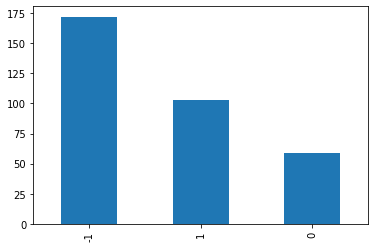

In [13]:
tweets_df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [14]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   User_Name  334 non-null    object 
 1   Tweet      334 non-null    object 
 2   Polarity   334 non-null    float64
 3   Analysis   334 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 10.6+ KB


In [15]:
tweets_df.describe()

,Polarity,Analysis
count,334.000000,334.000000
mean,-0.085814,-0.206587
std,0.306654,0.884884
min,-1.000000,-1.000000
25%,-0.257500,-1.000000
50%,-0.025000,-1.000000
75%,0.068750,1.000000
max,0.800000,1.000000


# PART - 3: PLOT THE WORDCLOUD

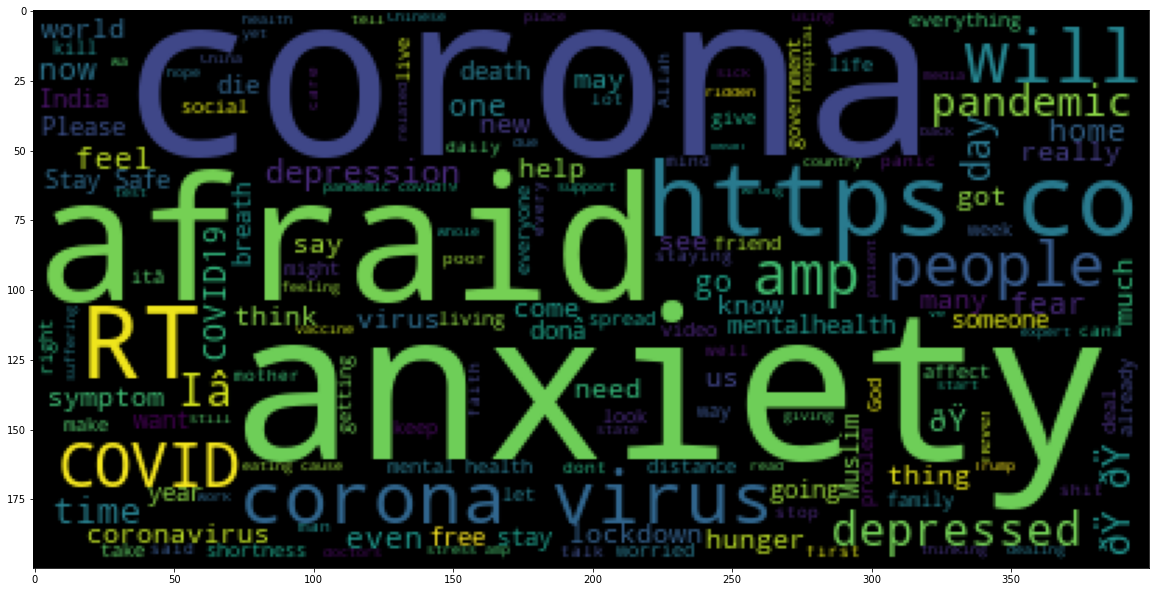

In [16]:
sentences = tweets_df['Tweet'].tolist()
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [17]:
positive = tweets_df[tweets_df['Analysis']==1]

In [18]:
positive

,User_Name,Tweet,Polarity,Analysis
2,sbonnin,Can we just learn how to live with this thing ...,0.136364,1
6,FSherbeny,We would highly appreciate it if you could spa...,0.160000,1
7,Tarleton_exe,We would highly appreciate it if you could spa...,0.160000,1
10,RT @Anxiety_Canada,RT @Anxiety_Canada: Nearly a year has passed s...,0.100000,1
11,deglenelliott,"Dr. Glen Elliott, Chief Psychiatrist &amp; Med...",0.366667,1
...,...,...,...,...
319,woub,The @ohiou Psych Dept has been researching men...,0.008333,1
320,Angelin33136900,The researchers identified specific patterns o...,0.280000,1
322,ChildrensOmaha,"Our kids are in crisis. Youth anxiety, depress...",0.050000,1
323,PatientVoice_UK,Recently we asked our Members about the effect...,0.266667,1


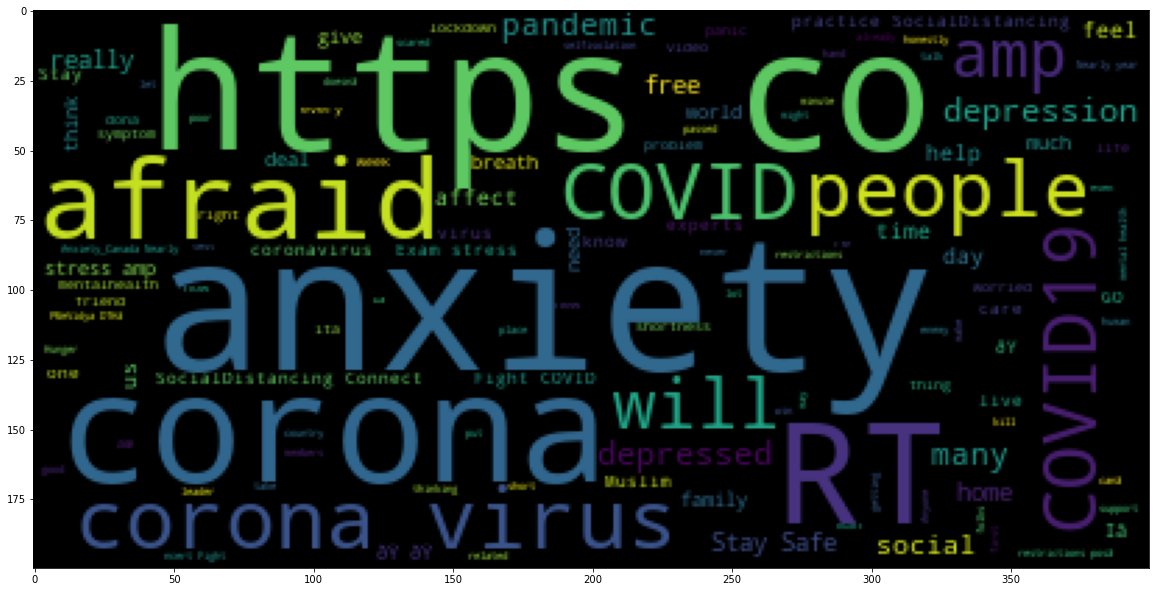

In [19]:
positive_list = positive['Tweet'].tolist()
positive_sentences_as_one_string = " ".join(positive_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))
plt.savefig('p.png')

In [20]:
negative = tweets_df[tweets_df['Analysis']==-1]

In [21]:
negative

,User_Name,Tweet,Polarity,Analysis
3,LindaS4810,RT @ThePaintedBrain: #Socialdistancing - altho...,-0.0500,-1
4,bayanna69,#Socialdistancing - although necessary to redu...,-0.0500,-1
28,ddevnm,@jokers_trick a guy like me... Look. Listen. I...,-0.1750,-1
29,dallasss__,RT @Suziebfitness: Corona virus- shortness of ...,-0.5000,-1
30,katelinheenann,RT @cloakzy: I just want this corona shit to p...,-0.5375,-1
...,...,...,...,...
328,LatinxUCC,Careful not to fall victim to these scammers.ð...,-0.0875,-1
330,hka8964,#FangBin was angry that the Chinese government...,-0.1000,-1
331,panich52,My mom was very angry': @RiteAid apologizes af...,-0.6500,-1
332,SanduBanu,Angry College Students Break Free From Prolong...,-0.0500,-1


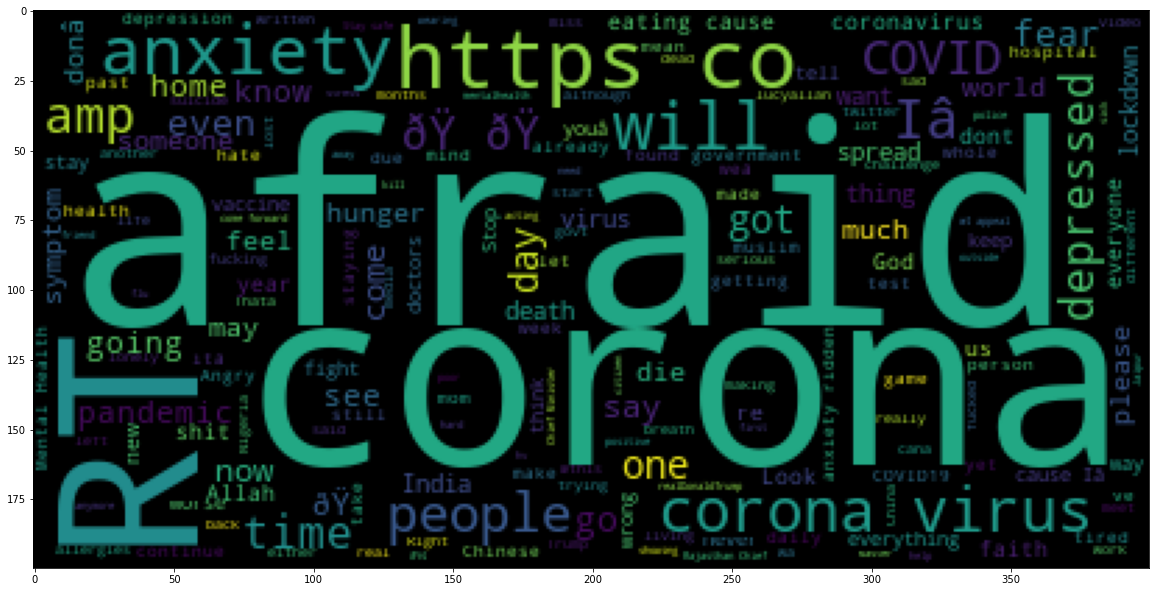

In [22]:
negative_list = negative['Tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.savefig('ne.png')

In [23]:
neutral = tweets_df[tweets_df['Analysis']==0]

In [24]:
neutral

,User_Name,Tweet,Polarity,Analysis
0,ALOHA77USA,#CatholicTwitter #Catholics #CatholicChurch #H...,0.0,0
1,prinkujose,RT @ALOHA77USA: #CatholicTwitter #Catholics #C...,0.0,0
5,TheJagdish,Dealing with #pandemic related stress? My comm...,0.0,0
8,WesElyMD,77 y/o #COVID19 #LongHauler struggling in #rec...,0.0,0
9,Saul_Says,Are you burned-out from the pandemic? https://...,0.0,0
12,Ashley_Bubbles2,Pandemic Burn-Out https://t.co/K9XrHpKIEF #pan...,0.0,0
13,errich_wilson,Isolation through the lens #COVID19 #Isolatio...,0.0,0
19,WesElyMD,77 y/o #COVID19 #LongHauler struggling in #rec...,0.0,0
24,bobbygmc15,Bburned-out from the pandemic? https://t.co/wG...,0.0,0
25,katewiles7,Does the pandemic have you burned-out? https:/...,0.0,0


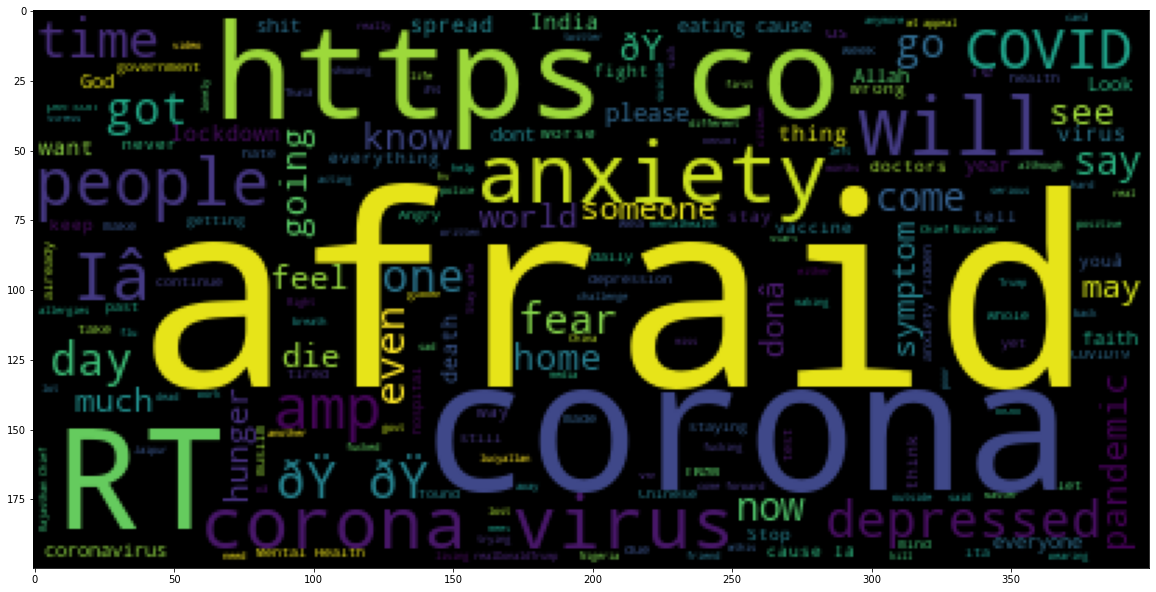

In [25]:
neutral_list = neutral['Tweet'].tolist()
neutral_sentences_as_one_string = " ".join(neutral_list)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))
plt.savefig('nu.png')

# PART - 4: DATA CLEANING- REMOVE PUNCTUATION FROM TEXT

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
def clean(tweets):
    tweets = re.sub(r'^RT[\s]+', '', tweets)
    tweets = re.sub(r'https?:\/\/.*[\r\n]*', '', tweets)
    tweets = re.sub(r'#', '', tweets)
    tweets = re.sub(r':','',tweets)
    tweets = re.sub(r'\n','',tweets)
    tweets = re.sub(r'@[A-Za-z0–9]+', '', tweets) 
    tweets = tweets.encode('ascii', 'ignore').decode('ascii')
    return tweets

In [28]:
tweets_df['Tweet'] = tweets_df['Tweet'].apply(clean)

In [29]:
tweets_df

,User_Name,Tweet,Polarity,Analysis
0,ALOHA77USA,CatholicTwitter Catholics CatholicChurch HolyM...,0.000000,0
1,prinkujose,77USA CatholicTwitter Catholics CatholicChurch...,0.000000,0
2,sbonnin,Can we just learn how to live with this thing ...,0.136364,1
3,LindaS4810,Socialdistancing - although necessary to redu...,-0.050000,-1
4,bayanna69,Socialdistancing - although necessary to reduc...,-0.050000,-1
...,...,...,...,...
329,BILD_tweets,We know the situation with Covid-19 is provoki...,0.020833,1
330,hka8964,FangBin was angry that the Chinese government ...,-0.100000,-1
331,panich52,My mom was very angry' apologizes after denyi...,-0.650000,-1
332,SanduBanu,Angry College Students Break Free From Prolong...,-0.050000,-1


# PART - 5: CREATE A PIPELINE TO REMOVE PUNCTUATION, STOPWORDS, PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [30]:
def message_cleaning(tweets):
    Test_punc_removed = [char for char in tweets if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [31]:
tweets_df_clean = tweets_df['Tweet'].apply(message_cleaning)

In [32]:
tweets_df_clean

0      [CatholicTwitter, Catholics, CatholicChurch, H...
1      [77USA, CatholicTwitter, Catholics, CatholicCh...
2      [learn, live, thing, COVID19, move, cant, stop...
3      [Socialdistancing, although, necessary, reduce...
4      [Socialdistancing, although, necessary, reduce...
                             ...                        
329    [know, situation, Covid19, provoking, anxiety,...
330    [FangBin, angry, Chinese, government, tried, c...
331    [mom, angry, apologizes, denying, undocumented...
332    [Angry, College, Students, Break, Free, Prolon...
333    [family, worse, Covid19, KylieJenner, Kardashi...
Name: Tweet, Length: 334, dtype: object

In [33]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['Tweet'])

In [34]:
#print(vectorizer.get_feature_names())
print(tweets_countvectorizer)
print(list(tweets_countvectorizer))

  (0, 155)	1
  (0, 156)	1
  (0, 154)	1
  (0, 308)	1
  (0, 1937)	1
  (0, 1599)	1
  (0, 300)	1
  (0, 1672)	1
  (0, 144)	1
  (0, 140)	1
  (1, 155)	1
  (1, 156)	1
  (1, 154)	1
  (1, 308)	1
  (1, 1937)	1
  (1, 1599)	1
  (1, 300)	1
  (1, 1672)	1
  (1, 144)	1
  (1, 140)	1
  (1, 72)	1
  (2, 1402)	1
  (2, 1431)	1
  (2, 2002)	1
  (2, 142)	1
  :	:
  (332, 142)	1
  (332, 162)	1
  (332, 100)	1
  (332, 127)	1
  (332, 262)	1
  (332, 172)	1
  (332, 556)	1
  (332, 473)	1
  (332, 369)	1
  (332, 563)	1
  (332, 498)	1
  (332, 505)	1
  (332, 506)	1
  (332, 411)	1
  (332, 407)	1
  (332, 1036)	1
  (332, 1035)	1
  (332, 390)	1
  (332, 312)	1
  (333, 190)	1
  (333, 1129)	1
  (333, 2187)	1
  (333, 697)	1
  (333, 354)	1
  (333, 350)	1
[<1x2211 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>, <1x2211 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>, <1x2211 sparse matrix of type '<class 'numpy.int64'>'
	

In [35]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
tweets_countvectorizer.shape

(334, 2211)

In [37]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())

In [38]:
X = tweets

In [39]:
x = tweets_countvectorizer

In [40]:
X

,0,1,2,3,4,5,6,7,8,9,...,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y = tweets_df['Analysis']

# PART - 6: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [42]:
X.shape

(334, 2211)

In [43]:
y.shape

(334,)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
#X

In [47]:
x_train.shape

(267, 2211)

In [48]:
x_test.shape

(67, 2211)

In [49]:
y_train.shape

(267,)

In [50]:
y_test.shape

(67,)

In [51]:
x_test[0]

<1x2211 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

# PART- 7: ASSESS TRAINED MODEL PERFORMANCE

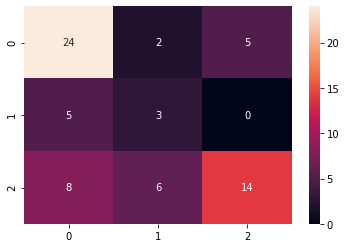

In [52]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
cm

array([[24,  2,  5],
       [ 5,  3,  0],
       [ 8,  6, 14]], dtype=int64)

In [54]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

          -1       0.65      0.77      0.71        31
           0       0.27      0.38      0.32         8
           1       0.74      0.50      0.60        28

    accuracy                           0.61        67
   macro avg       0.55      0.55      0.54        67
weighted avg       0.64      0.61      0.61        67



In [55]:
from sklearn.metrics import f1_score

In [56]:
print("Training Accuracy :", NB_classifier.score(x_train, y_train))
print("Validation Accuracy :", NB_classifier.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_predict_test,pos_label='positive', average='micro'))

Training Accuracy : 0.9812734082397003
Validation Accuracy : 0.6119402985074627
f1 score : 0.6119402985074627


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [57]:
from sklearn.metrics import f1_score

# Decision Tree Classifier

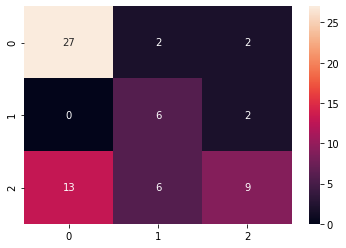

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_predict_test1 = model.predict(x_test)
cm1 = confusion_matrix(y_test, y_predict_test1)
sns.heatmap(cm1, annot = True)

In [59]:
print(classification_report(y_test,y_predict_test1))

              precision    recall  f1-score   support

          -1       0.68      0.87      0.76        31
           0       0.43      0.75      0.55         8
           1       0.69      0.32      0.44        28

    accuracy                           0.63        67
   macro avg       0.60      0.65      0.58        67
weighted avg       0.65      0.63      0.60        67



In [60]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_predict_test1,pos_label='positive', average='micro'))

Training Accuracy : 1.0
Validation Accuracy : 0.6268656716417911
f1 score : 0.6268656716417911


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Random Forest Classifier

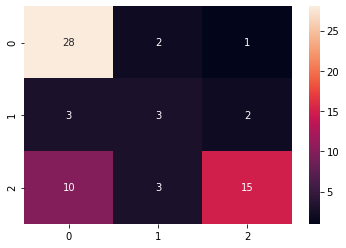

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_predict_test2 = model.predict(x_test)
cm2 = confusion_matrix(y_test, y_predict_test2)
sns.heatmap(cm2, annot = True)

In [62]:
print(classification_report(y_test,y_predict_test2))

              precision    recall  f1-score   support

          -1       0.68      0.90      0.78        31
           0       0.38      0.38      0.38         8
           1       0.83      0.54      0.65        28

    accuracy                           0.69        67
   macro avg       0.63      0.60      0.60        67
weighted avg       0.71      0.69      0.68        67



In [63]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_predict_test2,pos_label='positive', average='micro'))

Training Accuracy : 1.0
Validation Accuracy : 0.6865671641791045
f1 score : 0.6865671641791045


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Support Vector Machine(SVM)

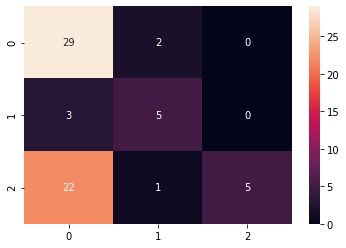

In [64]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_predict_test3 = model.predict(x_test)
cm3 = confusion_matrix(y_test, y_predict_test3)
sns.heatmap(cm3, annot = True)

In [65]:
print(classification_report(y_test,y_predict_test3))

              precision    recall  f1-score   support

          -1       0.54      0.94      0.68        31
           0       0.62      0.62      0.62         8
           1       1.00      0.18      0.30        28

    accuracy                           0.58        67
   macro avg       0.72      0.58      0.54        67
weighted avg       0.74      0.58      0.52        67



In [66]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_predict_test3,pos_label='positive', average='micro'))

Training Accuracy : 0.9737827715355806
Validation Accuracy : 0.582089552238806
f1 score : 0.582089552238806


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Logistic Regression

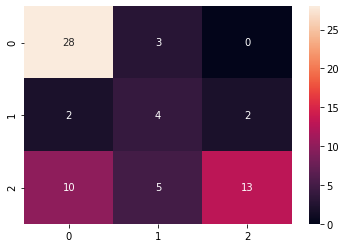

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_predict_test4 = model.predict(x_test)
cm4 = confusion_matrix(y_test, y_predict_test4)
sns.heatmap(cm4, annot = True)

In [68]:
print(classification_report(y_test,y_predict_test4))

              precision    recall  f1-score   support

          -1       0.70      0.90      0.79        31
           0       0.33      0.50      0.40         8
           1       0.87      0.46      0.60        28

    accuracy                           0.67        67
   macro avg       0.63      0.62      0.60        67
weighted avg       0.73      0.67      0.67        67



In [69]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_predict_test4,pos_label='positive', average='micro'))

Training Accuracy : 1.0
Validation Accuracy : 0.6716417910447762
f1 score : 0.6716417910447762


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# PART - 8: SAVING, RELOADING & TEST THE MODEL

In [70]:
# Import pickle Package
import pickle

In [71]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(NB_classifier, file)

In [72]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(x_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(x_test)  

Ypredict

Test score: 61.19 %


array([-1,  1, -1, -1,  0, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  0,  1,
       -1,  0, -1,  1, -1, -1,  0,  0,  0,  1,  0,  1, -1, -1,  0, -1, -1,
       -1,  1, -1,  1,  1,  0, -1,  1, -1, -1, -1, -1, -1,  1, -1,  0, -1,
       -1, -1,  1, -1, -1,  0, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1],
      dtype=int64)

# PART - 11: CONNECT WEBPAGE & MODEL

In [74]:
# importing the required libraries
import random, threading
from flask import Flask, render_template, request, redirect, url_for
#from joblib import load
import pickle

In [75]:
# start flask
app = Flask(__name__)

model = pickle.load(open('Pickle_RL_Model.pkl','rb'))

# render default webpage
@app.route('/')
def home():
    return render_template('home2.html')

# when the post method detect, then redirect to success function
@app.route('/predict', methods=['POST'])
def predict():
    
    '''
    For rendering results on HTML GUI
    '''
    int_features = [x for x in request.form.values()]
    print(int_features)
    #final_features = [np.array(int_features)]
    #print(len(final_features))
    #features = int_features.reshape(1,-1)
    feats = int_features[0]
    inp = [0]*2211
    words = vectorizer.get_feature_names()
    for index in range(len(words)):
        if words[index] in feats:
            inp[index]+=1
           
    inp = np.array(inp)
    inp = inp.reshape(1,2211)
    print(inp)
    prediction = model.predict(inp)
    

    return render_template('home2.html', prediction_text='Sentiment of the above tweet {}'.format(prediction))

In [ ]:
if __name__ == '__main__':
#     import random, threading, webbrowsers

    #port = 5000 + random.randint(0, 999)
    #print(port)
    #url = "http://127.0.0.1:{0}".format(port)
    app.run(use_reloader=False, debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Jul/2021 11:28:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jul/2021 11:28:30] "GET /static/css/main.css HTTP/1.1" 404 -
